# Week 13: Unsupervised Learning (Hierarchical clustering and DBSCAN)

```
- Machine Learning, Innopolis University (Fall semester 2023)
- Professor: Adil Khan
- Teaching Assistant: Gcinizwe Dlamini
```
<hr>


```
In this lab, you will practice Clustering techniques

Lab Plan
1. Hierarchical clustering
2. DBSCAN
```

<hr>


![](https://miro.medium.com/max/1400/1*Ewg7z7YxEXbjECkHPdtrvA.png)

## 1. Hierarchical Clustering

We will compare between different types of linkage algorithm in different datasets.

#### Differences between Hierarchical clustering and KMeans:
1. Each run of KMeans on the same data is different, but in HC will be the same.
2. For hyper-spherical clusters shape, k-means works better.
3. Time complexity is proportional to the square of #points in HC while K-Means is linearly proportional.

---

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Data generation

In [2]:
import time
import warnings
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import cluster
from sklearn.datasets import make_circles, make_blobs, make_moons
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

np.random.seed(0)

n_samples = 1500
noisy_circles = make_circles(n_samples=n_samples, factor=.5,
                                      noise=.05)
noisy_moons = make_moons(n_samples=n_samples, noise=.05)
blobs = make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None

# Anisotropic distributed data
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)

# blobs with varied variances
varied = make_blobs(n_samples=n_samples,
                             cluster_std=[1.0, 2.5, 0.5],
                             random_state=random_state)

## Trying different types of linkage algorithms in Agglomerative Hierarchical Clustering


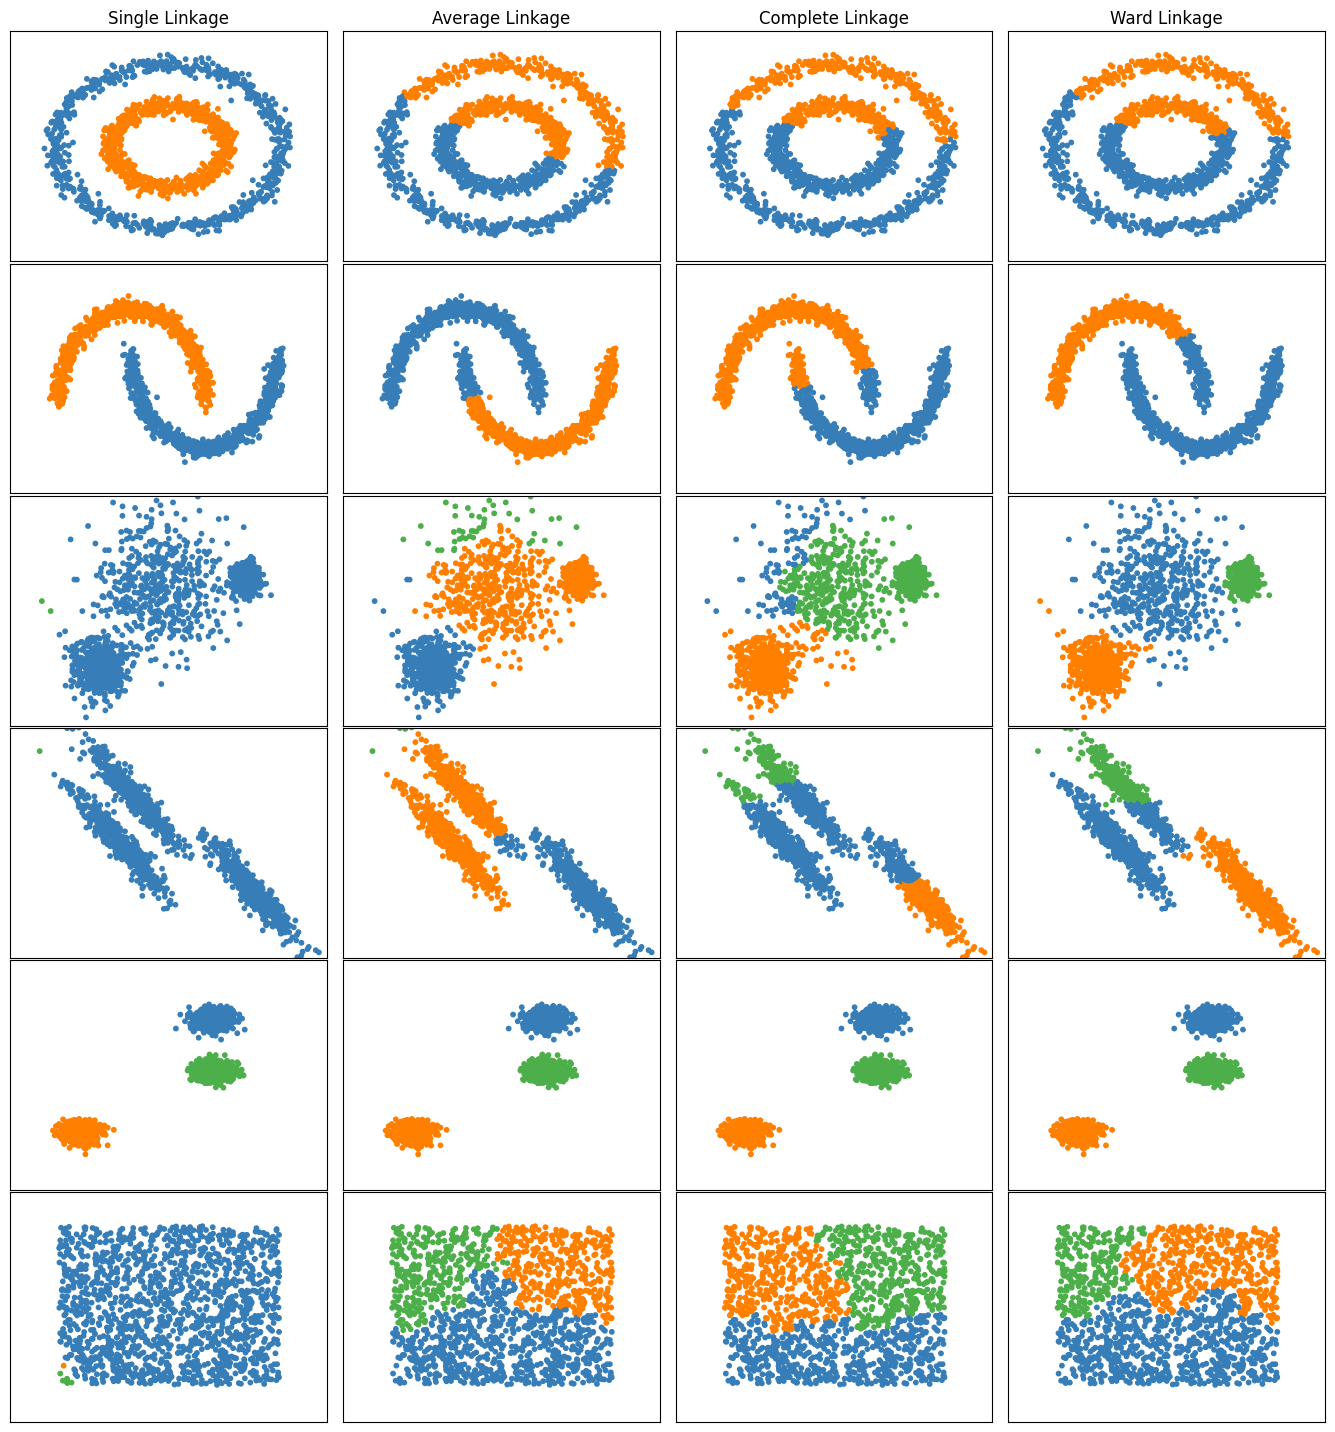

In [3]:
# Set up cluster parameters
plt.figure(figsize=(9 * 1.3 + 2, 14.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'n_clusters': 3}

datasets = [
    (noisy_circles, {'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {}),
    (aniso, {}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset
    X = StandardScaler().fit_transform(X)

    # Create cluster objects
    ward = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='ward')
    complete = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='complete')
    average = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='average')
    single = AgglomerativeClustering(
        n_clusters=params['n_clusters'], linkage='single')

    clustering_algorithms = (
        ('Single Linkage', single),
        ('Average Linkage', average),
        ('Complete Linkage', complete),
        ('Ward Linkage', ward),
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())

        plot_num += 1

plt.show()

## 4. DBSCAN

What's the pros and cons of DBSCAN?

<span style="color:blue">
Pros:

1. Discovers arbitrary shapes clusters
2. Robust towards outliers/noise

Cons:
1. Not efficient at clustering data with varying densities and sizes.
2. Sensitive to clustering params: minPoints & EPS
3. It doesn't scale good when the number of dimensions gets so big as the distance metric will converge to a constant value between any given examples.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

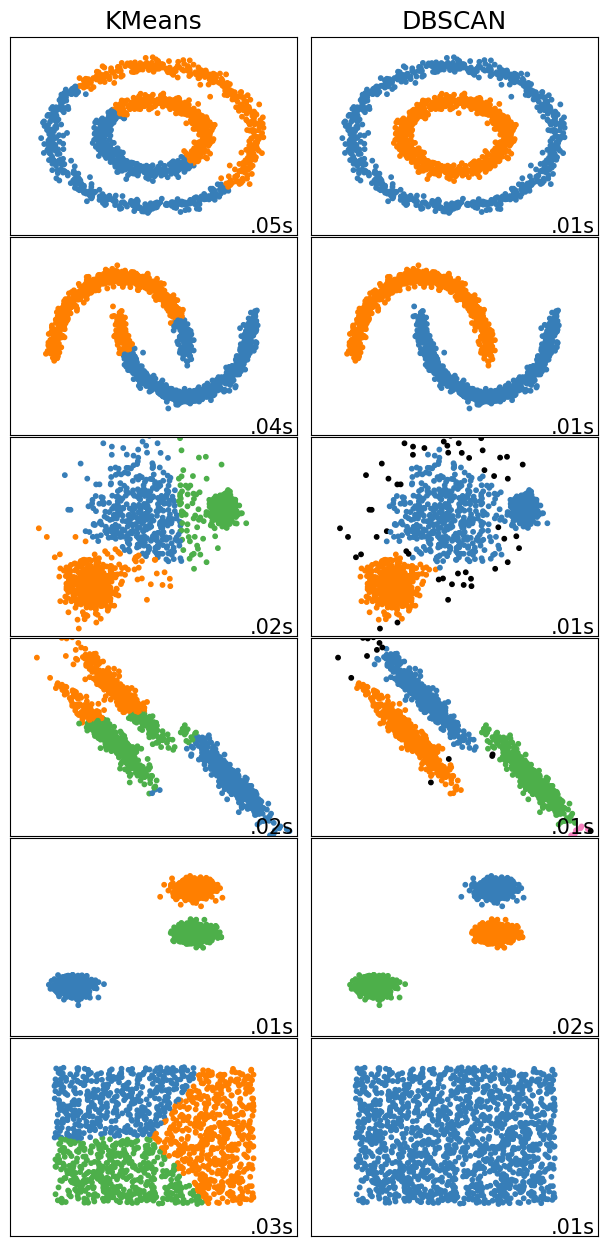

In [4]:
from sklearn.neighbors import kneighbors_graph

plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.subplots_adjust(left=.02, right=.98, bottom=.001, top=.96, wspace=.05,
                    hspace=.01)

plot_num = 1

default_base = {'quantile': .3,
                'eps': .3,
                'n_neighbors': 10,
                'n_clusters': 3
                }

datasets = [
    (noisy_circles, {'quantile': .2, 'n_clusters': 2}),
    (noisy_moons, {'n_clusters': 2}),
    (varied, {'eps': .18, 'n_neighbors': 2}),
    (aniso, {'eps': .15, 'n_neighbors': 2}),
    (blobs, {}),
    (no_structure, {})]

for i_dataset, (dataset, algo_params) in enumerate(datasets):
    # update parameters with dataset-specific values
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    # normalize dataset
    X = StandardScaler().fit_transform(X)

    # estimate bandwidth for mean shift
    bandwidth = cluster.estimate_bandwidth(X, quantile=params['quantile'])

    # connectivity matrix for structured Ward
    connectivity = kneighbors_graph(
        X, n_neighbors=params['n_neighbors'], include_self=False)
    # make connectivity symmetric
    connectivity = 0.5 * (connectivity + connectivity.T)

    # Create cluster objects
    ms = cluster.KMeans(n_clusters=params['n_clusters'])
    dbscan = cluster.DBSCAN(eps=params['eps'])

    clustering_algorithms = (
        ('KMeans', ms),
        ('DBSCAN', dbscan)
    )

    for name, algorithm in clustering_algorithms:
        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets), len(clustering_algorithms), plot_num)
        if i_dataset == 0:
            plt.title(name, size=18)

        colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                             '#f781bf', '#a65628', '#984ea3',
                                             '#999999', '#e41a1c', '#dede00']),
                                      int(max(y_pred) + 1))))
        # add black color for outliers (if any)
        colors = np.append(colors, ["#000000"])
        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors[y_pred])

        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())
        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=15,
                 horizontalalignment='right'
                )
        plot_num += 1

plt.subplots_adjust(right=0.3)
plt.show()

## Self Practice task

Using [UNSW-NB15 Dataset](https://www.dropbox.com/s/nsvgwps3abdoxnq/clustering_data.zip?dl=1):

1. Preprocess the dataset
2. Reduce dimension using PCA
3. Remove outliers
4. Cluster the data using Agglomerative Clustering, DBSCAN and Kmeans. Find the optimal number of clusters for each method
5. Visualize the data clusters (use PCA with 2 components)

In [5]:
!pip install category_encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.9 MB/s eta 0:00:00


In [6]:
from category_encoders import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.metrics import silhouette_score
from sklearn.metrics import adjusted_rand_score


In [7]:
# !pip install pandas-profiling

# !pip install ydata_profiling
# import ydata_profiling

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Lab 11/trainset.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Lab 11/testset.csv')

In [11]:
# # check model's types
# types = train.dtypes
# print("Number categorical featues:", sum(types=='object'))
# print(types)

In [12]:
#Binary encoding

from category_encoders import HashingEncoder, BinaryEncoder, OneHotEncoder

enc = BinaryEncoder(cols=train.select_dtypes('object').columns)
train= enc.fit_transform(train)
test=enc.transform(test)

## Remove outliers

In [13]:
from sklearn.ensemble import IsolationForest


outlier_detector = IsolationForest(contamination=0.05)
outliers_train = outlier_detector.fit_predict(train)
outliers_test = outlier_detector.predict(test)

train = train[outliers_train == 1]
test = test[outliers_test == 1]



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [14]:
columns=train.columns
# Create StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to the selected columns
scaler.fit(train[columns])

# Transform the selected columns to standardize them
train[columns] = scaler.transform(train[columns])
test[columns] = scaler.transform(test[columns])


In [15]:
# Берём 10% от всех данных
train = train.sample(frac=0.1, random_state=42)
test = test.sample(frac=0.1, random_state=42)

## Reduce dimensions

In [16]:
columns=train.columns
from sklearn.decomposition import PCA
pca = PCA(n_components=55)
x_PCA = pca.fit(train)
j=1
pca.explained_variance_ratio_

importance_dict = dict(zip(columns, pca.explained_variance_ratio_))
sorted_importance = sorted(importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)
print(sorted_importance)


[('dur', 0.2569662493836132), ('proto_0', 0.0915840241192276), ('proto_1', 0.0870084567101842), ('proto_2', 0.07592933315934458), ('proto_3', 0.04363940113702018), ('proto_4', 0.04098685143281268), ('proto_5', 0.0385695855111214), ('proto_6', 0.0365654269425172), ('proto_7', 0.03037497889292474), ('service_0', 0.026172650258769106), ('service_1', 0.02411006503744599), ('service_2', 0.02123130123999924), ('service_3', 0.02055270453028035), ('state_0', 0.018727495660056135), ('state_1', 0.017227131783141465), ('state_2', 0.016802688403421254), ('state_3', 0.015511353398195156), ('spkts', 0.014454620182333816), ('dpkts', 0.011789650327001971), ('sbytes', 0.010606724291214446), ('dbytes', 0.009499998025301248), ('rate', 0.008620680210961212), ('sttl', 0.008105497174675631), ('dttl', 0.007952957859149783), ('sload', 0.00663492933706455), ('dload', 0.006351664974017964), ('sloss', 0.006046432853814046), ('dloss', 0.0059960856976765085), ('sinpkt', 0.005513634284416269), ('dinpkt', 0.00452369

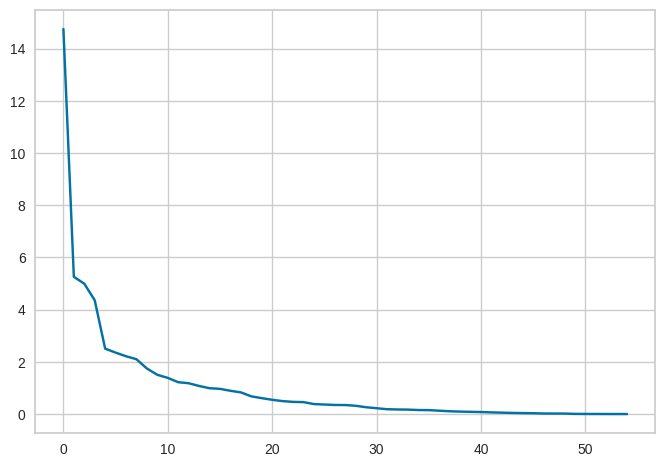

In [17]:
import matplotlib.pyplot as plt

plt.plot(pca.explained_variance_)

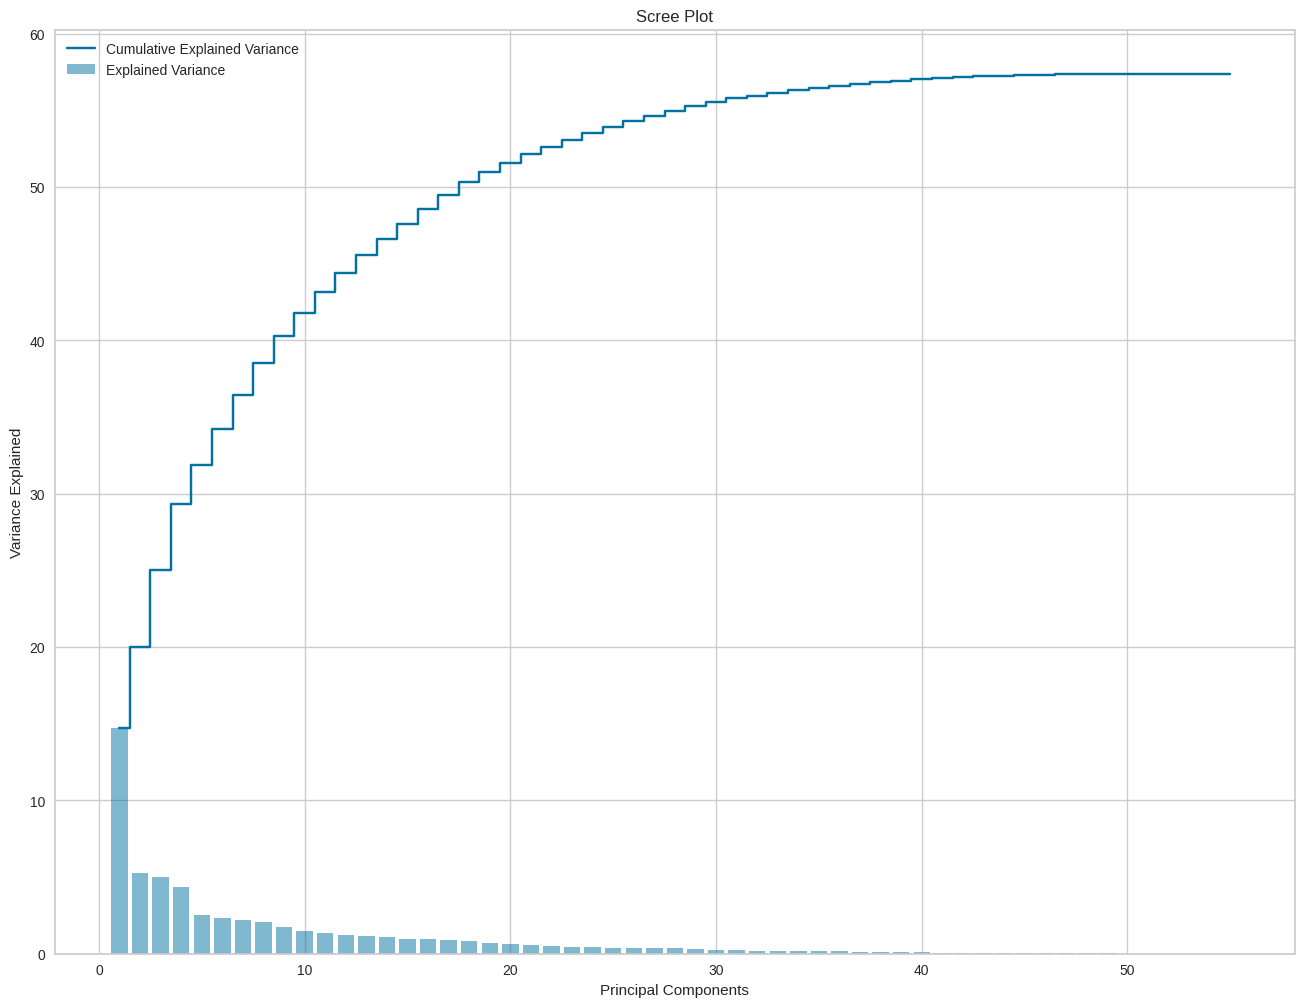

In [18]:
explained_variance = pca.explained_variance_

# Calculate the cumulative explained variance
cumulative_explained_variance = explained_variance.cumsum()

# Plot the explained variance and cumulative explained variance
plt.figure(figsize=(16, 12))
plt.bar(range(1, len(explained_variance) + 1), explained_variance, alpha=0.5, align='center', label='Explained Variance')
plt.step(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, where='mid', label='Cumulative Explained Variance')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.title('Scree Plot')
plt.legend()
plt.show()

In [19]:
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pca = sklearnPCA(n_components=10)
train = pd.DataFrame(sklearn_pca.fit_transform(train))
test = pd.DataFrame(sklearn_pca.transform(test))

## Clustering Kmeans

In [20]:
from sklearn.cluster import KMeans
import plotly.express as px

wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train)
    wcss.append(kmeans.inertia_)

fig = px.line(y=wcss, x=range(1, 15), title='Elbow Method',  markers=True)
fig.update_layout(title="Elbow Method", xaxis_title="Number of clusters", yaxis_title="WCSS")
fig.show()

In [21]:
from sklearn.metrics import silhouette_score
silhouettes = []
for i in range(2, 10):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(train)
    y = kmeans.predict(train)
    score = silhouette_score(train, y)
    silhouettes.append(score)

fig = px.line(y=silhouettes, x=range(2, 10), markers=True)
fig.update_layout(title="Silhouette Method", xaxis_title="Number of clusters", yaxis_title="silhouette score")
fig.show()

## Aglomerative

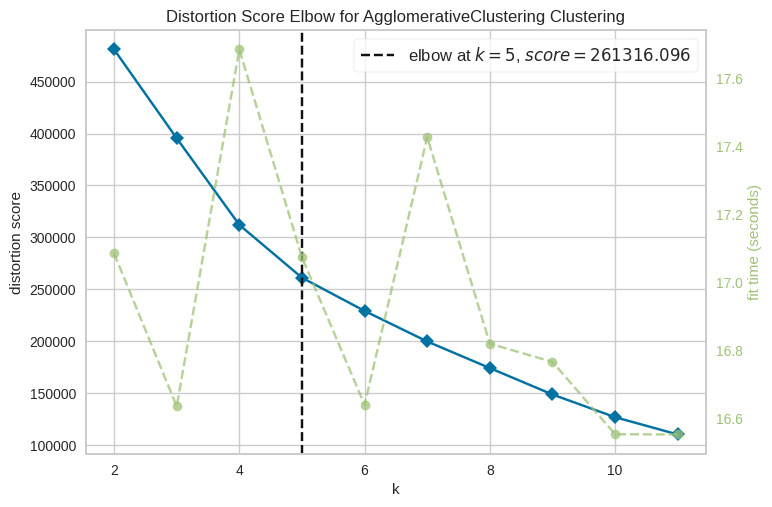

In [22]:
# Агломеративная кластеризация (Agglomerative Clustering)
model_agg = AgglomerativeClustering()
visualizer_agg = KElbowVisualizer(model_agg, k=(2, 12))
visualizer_agg.fit(train)
visualizer_agg.show()
optimal_k_agg = visualizer_agg.elbow_value_

In [23]:
# DBSCAN
silhouette_scores = []
for eps in np.arange(0.1, 2.0, 0.1):
    dbscan = DBSCAN(eps=eps)
    dbscan_clusters = dbscan.fit_predict(train)
    silhouette_scores.append(silhouette_score(train, dbscan_clusters))

optimal_eps_index = np.argmax(silhouette_scores)
optimal_eps_dbscan = np.arange(0.1, 2.0, 0.1)[optimal_eps_index]
# dbscan = DBSCAN(eps=optimal_eps_dbscan)
# dbscan_clusters = dbscan.fit_predict(train_no_outliers)
# optimal_k_dbscan = len(np.unique(dbscan_clusters)) - (1 if -1 in dbscan_clusters else 0)


In [24]:
# Вывод оптимального числа кластеров для каждого метода
print(f"Optimal number of clusters (KMeans): {8}")
print(f"Optimal number of clusters (Agglomerative Clustering): {optimal_k_agg}")
print(f"Optimal number of epsilon (DBSCAN): {optimal_eps_dbscan}")

Optimal number of clusters (KMeans): 8
Optimal number of clusters (Agglomerative Clustering): 5
Optimal number of epsilon (DBSCAN): 1.0


In [25]:
# Кластеризация с использованием KMeans с оптимальным k
kmeans = KMeans(n_clusters=8)
clusters_kmeans_train = kmeans.fit_predict(train)
clusters_kmeans_test = kmeans.predict(test)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [26]:
# Кластеризация с использованием Agglomerative Clustering с оптимальным k
agg = AgglomerativeClustering(n_clusters=optimal_k_agg)
clusters_agg_train = agg.fit_predict(train)
clusters_agg_test = agg.fit_predict(test)

In [27]:
# Кластеризация с использованием DBSCAN с оптимальным eps
dbscan = DBSCAN(eps=optimal_eps_dbscan)
clusters_dbscan_train = dbscan.fit_predict(train)
clusters_dbscan_test = dbscan.fit_predict(test)

## Visualize

In [28]:
pca_2d = PCA(n_components=2)
train = pca_2d.fit_transform(train)
test = pca_2d.transform(test)

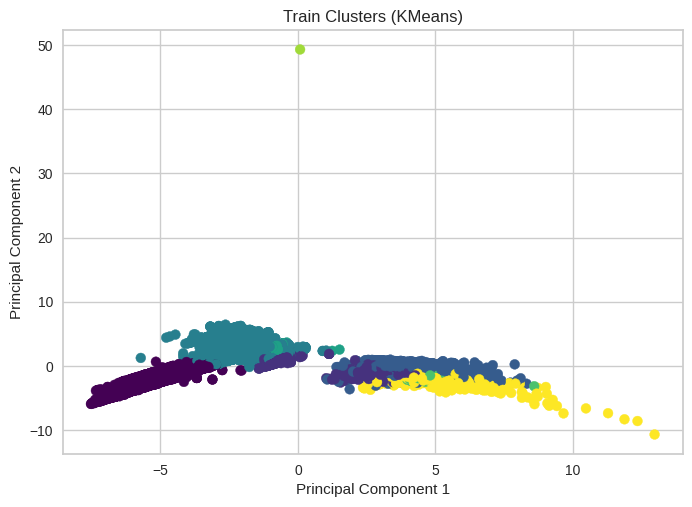

In [29]:
# График для KMeans для тренировочных данных
plt.scatter(train[:, 0], train[:, 1], c=clusters_kmeans_train, cmap='viridis', s=50)
plt.title('Train Clusters (KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

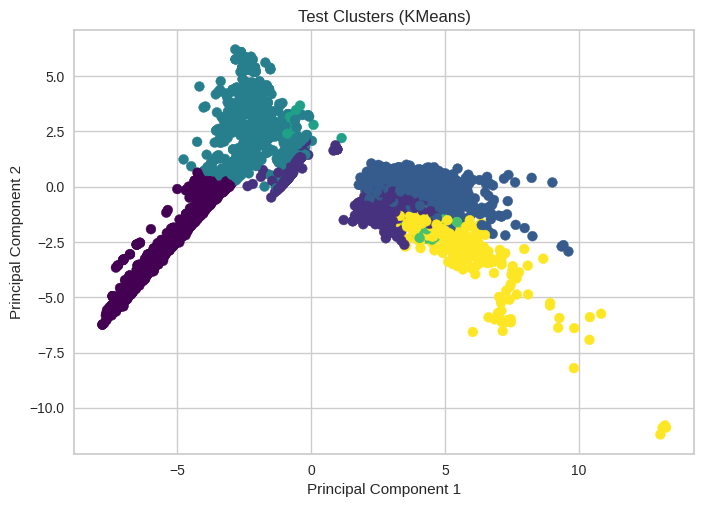

In [30]:
# График для KMeans для тестовых данных
plt.scatter(test[:, 0], test[:, 1], c=clusters_kmeans_test, cmap='viridis', s=50)
plt.title('Test Clusters (KMeans)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

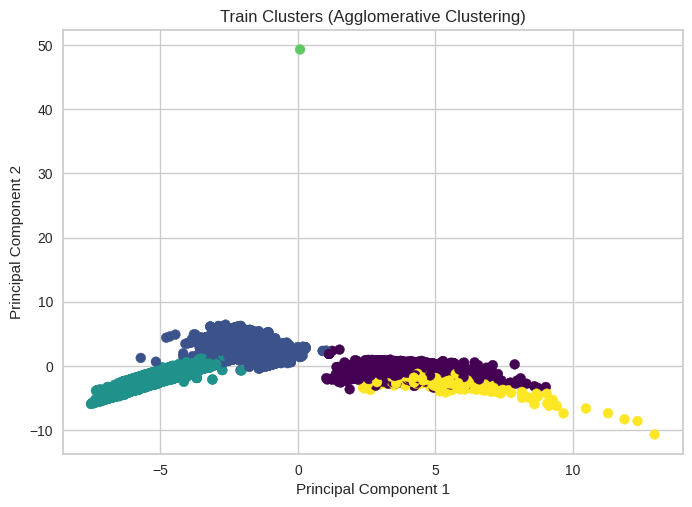

In [31]:
# График для Agglomerative Clustering для тренировочных данных
plt.scatter(train[:, 0], train[:, 1], c=clusters_agg_train, cmap='viridis', s=50)
plt.title('Train Clusters (Agglomerative Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

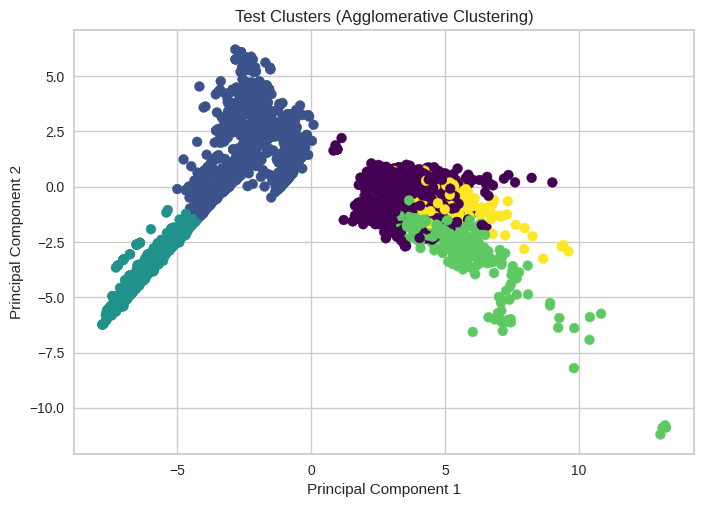

In [32]:
# График для Agglomerative Clustering для тестовых данных
plt.scatter(test[:, 0], test[:, 1], c=clusters_agg_test, cmap='viridis', s=50)
plt.title('Test Clusters (Agglomerative Clustering)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

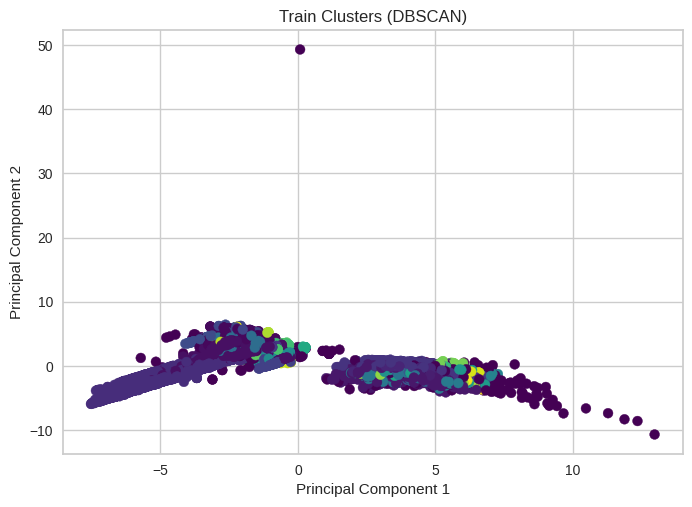

In [33]:
# График для DBSCAN для тренировочных данных
plt.scatter(train[:, 0], train[:, 1], c=clusters_dbscan_train, cmap='viridis', s=50)
plt.title('Train Clusters (DBSCAN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

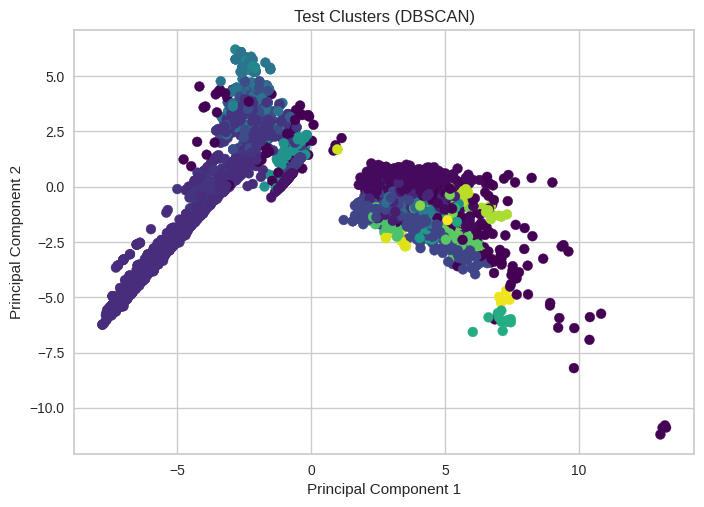

In [34]:
# График для DBSCAN для тестовых данных
plt.scatter(test[:, 0], test[:, 1], c=clusters_dbscan_test, cmap='viridis', s=50)
plt.title('Test Clusters (DBSCAN)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()